# P2 - Statistics + Visualization


This project is intended to give you experience with statistics and working with a large data set.





## Autograder Setup

The next code cell should be uncommented to run the autograder tests when using Colab/DeepNote. If you are using an environment with `otter-grader` already installed (your own machine, lab machines), then do not uncomment the code.

In [1]:
# !pip install otter-grader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 168 kB 3.7 MB/s 
     |████████████████████████████████| 97 kB 3.5 MB/s 
     |████████████████████████████████| 297 kB 24.8 MB/s 
     |████████████████████████████████| 46 kB 1.6 MB/s 
     |████████████████████████████████| 84 kB 1.3 MB/s 


For this project, you will download the data and public autograder tests using a new mechanism (see later sections).  

## Project Setup

You should use the following modules in this assignment and not need any additional modules. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import datetime
import os 
import getpass
import requests

import otter


# Flight Delays

Suppose the Houghton County Airport (CMX) is ready to renew its passenger airplance contract.  Airport officials and interested passengers would like to select an airline and connecting city that has reliable service.  *Currently, CMX is being served by United Airlines through Chicago-O'hare (ORD); it has been served by Delta in the past with connections to Minneapolis-St. Paul (MSP).* 

In order to make an informed decision, you have been tasked to look at flight delay statistics for three potential connector airports: 

* Chicago - O'hare (ORD) 
* Detroit (DTW) 
* Minneapolis - St. Paul (MSP) 

The data you are provided comes from the US Department of Transportation's [Bureau of Transportation Statistics (BTS)](https://www.bts.gov).  In particular, it comes from the Reporting Carrier On-Time Performance data tables:  
https://www.transtats.bts.gov/TableInfo.asp?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr&V0s1_b0yB=D

Information on the variables can be found in the Field Information:  
https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ


The data is structure with the following elements: 

* "YEAR"
* "MONTH"
* "DAY_OF_MONTH"
* "OP_UNIQUE_CARRIER" - Unique Carrier Code
* "TAIL_NUM" - Tail number 
* "OP_CARRIER_FL_NUM" - Flight number 
* "ORIGIN" - Origin Airport code 
* "DEST" - Destination Airport code 
* "CRS_DEP_TIME" - Computer Reservation System Departure Time (local time: hhmm)
* "DEP_TIME" - Actual Departure Time (local time: hhmm)
* "DEP_NEXT_DAY" - the flight departed on the: (scheduled day = 0), (next day = 1), (following day = 2), or (day before  = -1)
* "CRS_ARR_TIME" - Computer Reservation System Arrival Time (local time: hhmm)
* "ARR_TIME" - Actual Arrival Time 
* "ARR_NEXT_DAY" - the flight arrived on the: (scheduled day = 0), (next day = 1), (following day = 2), or (day before  = -1)
* "CANCELLED" - Cancelled Flight Indicator (1 = Yes)
* "DIVERTED" - Diverted Flight Indicator (1 = Yes)

You have access to 5 years of data Jan 2017 - Dec 2021. 

## Access the Data 

The data is available as a [Kaggle](http://www.kaggle.com) data set.  


Steps to download: 

1. Create a [Kaggle](https://www.kaggle.com/) account (if you don't have one already). 
2. After you log in, go to "My Account" 
3. Under API, select "Create API token", this will download a `kaggle.json` file that has two pieces of information:  `username` and  `key`.  **Keep the `key` private!**
4. Post your username on Ed in response to the question on this.  I am not making the data available publicly, but will share it with you all by your kaggle account.  


You will need to use your Kaggle credentials: `username` and API `key` to access the data using one of the methods below. 

## Q0 - Data Access 

Complete assignment P2a. 

Email or Post on Ed your Kaggle `username`.  The post on Ed can be a private response.  **DO NOT SHARE YOUR KEY!**  just share your Kaggle username. 

Then uncomment one of the methods below to get your username and key available. 

#### Method 1: (Recomended) 

Copy and paste the key information (does not upload your key information to the Drive).

In [3]:
# import os 
# from getpass import getpass

# os.environ['KAGGLE_USERNAME'] = getpass("Enter Kaggle Username: ")
# os.environ['KAGGLE_KEY'] = getpass("Enter Kaggle API Key:  ")

Enter Kaggle Username: ··········
Enter Kaggle API Key:  ··········


#### Method 2: 

Load `kaggle.json` to Colab directory (file is destroyed when sevice is disconnected).  This method relys on Google's security for safely storing and protecting your data.

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# with open("kaggle.json") as f:
#     keys = json.load(f)

# os.environ['KAGGLE_USERNAME'] = keys["username"] # username from the json file
# os.environ['KAGGLE_KEY'] = keys["key"] # key from the json file

## Download the Data 

Uncomment the following to get the data and autograder tests. 

In [4]:
# !kaggle datasets download -d lebrown/un5550-f22-p2     # api copied from kaggle

 66% 43.0M/65.4M [00:01<00:00, 50.4MB/s]
100% 65.4M/65.4M [00:01<00:00, 52.1MB/s]


In [5]:
# !unzip un5550-f22-p2.zip

Archive:  un5550-f22-p2.zip
  inflating: flight-data.csv         
  inflating: tests/q1.py             
  inflating: tests/q10.py            
  inflating: tests/q2.py             
  inflating: tests/q3.py             
  inflating: tests/q4.py             
  inflating: tests/q5.py             
  inflating: tests/q6.py             
  inflating: tests/q7.py             
  inflating: tests/q8.py             


As you can see, there is a data file `flight-data`.  Now with the test files available we can set up the grader. 

In [6]:
# grader = otter.Notebook()

### Aside: Creating this DataFrame 

The raw data from the BTS comes in files for each month over the 5 year period.  So a collection of 60 files.  

The 60 files can be combined together into a single data frame through multiple methods.   Here we can compare two. 



#### Create DataFrame - version 1 

In this version we will use pandas `concat` or concatenate function. 

```python
import time
start = time.time()
df = pd.DataFrame() 

# Iterate over all files 
for file in os.listdir(path):
    if file.endswith(".csv"):
        df = pd.concat([df, pd.read_csv(file, header=None)], axis=0)

# reset the index 
df.reset_index(drop=True, inplace=True)
end = time.time()

print("Elapsed time:  ", end - start)
```

This method takes ~35 seconds to run. 

**What's the problem with this version?** 

The concatenate function is called each iteration of the loop and it is slow!



#### Create DataFrame - version 2 

In this version we still use `concat`, but do it on a list of data frames. 

```python
import glob
start = time.time()
# files = sorted(glob.glob('' + "*.csv"))
files = sorted(glob.glob(os.path.join(path, "*.csv")))

dfs = (
    pd.read_csv(f, header=None) for f in files
)

df2 = pd.concat(dfs)

# reset the index 
df2.reset_index(drop=True, inplace=True)
end = time.time()

print("Elapsed time:  ", end - start)
```

This methods takes ~18 seconds to run.  

## Q1 (5 pts) - Load Data 

Read in the data.    

Set the column names to be: `year`, `month`, `day`, `carrier`, `tailNum`, `flNum`, `origin`, `dest`, `crsDepTime`, `actDepTime`, `depNextDay`, `crsArrTime`, `actArrTime`, `arrNextDay`, `cancelled`, `diverted` 
 

In [ ]:
# import time
# start = time.time()
# df = pd.DataFrame() 
# path="/content"
# # Iterate over all files 
# for file in os.listdir(path):
#     if file.endswith(".csv"):
#         df = pd.concat([df, pd.read_csv(file, header=None)], axis=0)

# # reset the index 
# df.reset_index(drop=True, inplace=True)
# end = time.time()

# print("Elapsed time:  ", end - start)
# # df

In [7]:
# import glob
# import time
# start = time.time()
# # files = sorted(glob.glob('' + "*.csv"))
# files = sorted(glob.glob(os.path.join("/content", "*.csv")))

# dfs = (
#     pd.read_csv(f, header=None) for f in files
# )

# df = pd.concat(dfs)

# # reset the index 
# df.reset_index(drop=True, inplace=True)
# end = time.time()

# print("Elapsed time:  ", end - start)

Elapsed time:   8.582278728485107


In [8]:
# Read in data, set DataFrame columns to names above 
# url = 'https://www.transtats.bts.gov/TableInfo.asp?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr&V0s1_b0yB=D'
flights = pd.read_csv('flight-data.csv', header=None)
flights.columns = ['year', 'month', 'day', 'carrier', 'tailNum', 'flNum', 'origin', 'dest', 'crsDepTime', 'actDepTime', 'depNextDay', 'crsArrTime', 'actArrTime', 'arrNextDay', 'cancelled', 'diverted']

# flights = df
flights

,year,month,day,carrier,tailNum,flNum,origin,dest,crsDepTime,actDepTime,depNextDay,crsArrTime,actArrTime,arrNextDay,cancelled,diverted
0,2021,4,11,AS,N309AS,792,SEA,DTW,1010,1013.0,0,1730,1736.0,0,0.0,0.0
1,2021,4,11,AS,N408AS,1011,ORD,SEA,700,703.0,0,940,916.0,0,0.0,0.0
2,2021,4,11,AS,N520AS,1012,SEA,MSP,1830,1825.0,0,2345,2337.0,0,0.0,0.0
3,2021,4,11,AS,N472AS,1013,ORD,SEA,1405,1404.0,0,1645,1627.0,0,0.0,0.0
4,2021,4,11,AS,N237AK,1014,SEA,ORD,1045,1054.0,0,1650,1652.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5068842,2017,12,8,WN,N558WN,153,ATL,DTW,830,827.0,0,1035,1010.0,0,0.0,0.0
5068843,2017,12,8,WN,N403WN,315,ATL,DTW,2215,NaN,0,10,NaN,0,1.0,0.0
5068844,2017,12,8,WN,N7711N,1322,ATL,DTW,1525,1554.0,0,1725,1926.0,0,0.0,0.0
5068845,2017,12,8,WN,N268WN,1588,ATL,MSP,850,1017.0,0,1035,1305.0,0,0.0,0.0


In [9]:
grader.check("q1")

q1 results: All test cases passed!

## Q2 (3 pts) - Explore Data

Let's start to explore the data.  

In [10]:
print("Flight data: %8d rows,  %d columns" % (flights.shape[0], flights.shape[1]))

Flight data:  5068847 rows,  16 columns


Report the number of flights departing and arriving from each of the three airports under study: `DTW`, `MSP`, and `ORD`

In [11]:
numArrDTW = flights['dest'].value_counts()['DTW']
numDepDTW = flights['origin'].value_counts()['DTW']
print("DTW flights:   %7d arrivals,  %7d departures" % (numArrDTW, numDepDTW))

DTW flights:    648915 arrivals,   648900 departures


In [12]:
numArrMSP = flights['dest'].value_counts()['MSP']
numDepMSP = flights['origin'].value_counts()['MSP']
print("MSP flights:   %7d arrivals,  %7d departures" % (numArrMSP/2, numDepMSP/2))

MSP flights:    322229 arrivals,   322257 departures


In [13]:
numArrORD = flights['dest'].value_counts()['ORD']
numDepORD = flights['origin'].value_counts()['ORD']
print("ORD flights:   %7d arrivals,  %7d departures" % (numArrORD/2, numDepORD/2))

ORD flights:    655906 arrivals,   656008 departures


*Note*: The number of flights arriving and departing from the three airports exceeds the total number of flights, because flights between the 3 airports are counted twice. 

In [14]:
grader.check("q2")

q2 results: All test cases passed!

## Q3 (3 pts) - Cancelled and Diverted Flights

We are going to focus on flights that took off and landed, that is, flights that were not cancelled or diverted.  

Before, getting rid of those entries, let's look at how many flights for each airport were cancelled and diverted. 

In [15]:
numCanArrDTW = len(flights[(flights.cancelled == 1) & (flights.dest == 'DTW')])
numCanDepDTW = len(flights[(flights.cancelled == 1) & (flights.origin == 'DTW')])
numDivArrDTW = len(flights[(flights.diverted == 1) & (flights.dest == 'DTW')])
numDivDepDTW = len(flights[(flights.diverted == 1) & (flights.origin == 'DTW')])
print("DTW cancelled flights: %7d arrs, %7d deps\n\tdiverted flights: %7d arrs, %7d deps" 
      % (numCanArrDTW, numCanDepDTW, numDivArrDTW, numDivDepDTW))

DTW cancelled flights:    9325 arrs,    9264 deps
	diverted flights:     739 arrs,    1459 deps


In [16]:
numCanArrMSP = len(flights[(flights.cancelled == 1) & (flights.dest == 'MSP')])
numCanDepMSP = len(flights[(flights.cancelled == 1) & (flights.origin == 'MSP')])
numDivArrMSP = len(flights[(flights.diverted == 1) & (flights.dest == 'MSP')])
numDivDepMSP = len(flights[(flights.diverted == 1) & (flights.origin == 'MSP')])
print("MSP cancelled flights: %7d arrs, %7d deps\n\tdiverted flights: %7d arrs, %7d deps" 
      % (numCanArrMSP, numCanDepMSP, numDivArrMSP, numDivDepMSP))

MSP cancelled flights:    9337 arrs,    9298 deps
	diverted flights:    1019 arrs,    1555 deps


In [17]:
numCanArrORD = len(flights[(flights.cancelled == 1) & (flights.dest == 'ORD')])
numCanDepORD = len(flights[(flights.cancelled == 1) & (flights.origin == 'ORD')])
numDivArrORD = len(flights[(flights.diverted == 1) & (flights.dest == 'ORD')])
numDivDepORD = len(flights[(flights.diverted == 1) & (flights.origin == 'ORD')])
print("ORD cancelled flights: %7d arrs, %7d deps\n\tdiverted flights: %7d arrs, %7d deps" 
      % (numCanArrORD, numCanDepORD, numDivArrORD, numDivDepORD))

ORD cancelled flights:   36875 arrs,   35638 deps
	diverted flights:    3258 arrs,    3307 deps


In [18]:
grader.check("q3")

q3 results: All test cases passed!

The absolute number of cancelled and diverted flights can be somewhat misleading because O'hare has many more flights in total.  

So, let's look at these values normalized, that is, the percentage of total arriving or departing flights that are cancelled or diverted.

In [19]:
d = np.array([[numCanArrDTW / numArrDTW *100, numCanDepDTW / numDepDTW *100, 
               numDivArrDTW / numArrDTW *100, numDivDepDTW / numDepDTW *100], 
              [numCanArrMSP / numArrMSP *100, numCanDepMSP / numDepMSP *100, 
               numDivArrMSP / numArrMSP *100, numDivDepMSP / numDepMSP *100],
              [numCanArrORD / numArrORD *100, numCanDepORD / numDepORD *100, 
               numDivArrORD / numArrORD *100, numDivDepORD / numDepORD *100]])
canDivFls = pd.DataFrame(data=d, 
                        columns = ['PercArrCan', 'PercDepCan', 'PercArrDiv', 
                                   'PercDepDiv'], 
                        index = ['DTW', 'MSP', 'ORD'])
canDivFls

,PercArrCan,PercDepCan,PercArrDiv,PercDepDiv
DTW,1.437014,1.427647,0.113882,0.224842
MSP,1.448814,1.442637,0.158117,0.241267
ORD,2.810995,2.716276,0.248359,0.252055


## Q4 (4 pts) - Clean Data 

Now, let's remove the cancelled and diverted flights from further analysis.  

After removing both reset the index on the remaining flights in the DataFrame.

In [20]:
# Remove the cancelled and diverted flights.  
# Then, reset the index of the flights DataFrame


CanDiv = flights[(flights.cancelled == 1) | (flights.diverted == 1)]
 
flights = flights.drop(CanDiv.index)
flights.reset_index(drop=True, inplace=True)

print("Flight data:   %8d rows" % flights.shape[0])


Flight data:    4950620 rows


In [21]:
grader.check("q4")

q4 results: All test cases passed!

## Q5 (5 pts) - Extract Time Information

Both the departure and arrival times were read in as integers or floating-point numbers in local time format: `hhmm`. Write two functions, `extract_hour` and `extract_mins` that converts the local time to hours and minutes, respectively. Hint: You may want to use modular arithmetic and integer division.

Notes: 

* The function should work on a single value passed or a Series passed in as an argument. 
* The function should not have a `for` loop, if it does you will lose points! 

In [22]:
def extract_hour(time):
    """
    Extract hour information from the time given in hhmm format.
    

    Input:
        time (float64 or int64): Series of time given in hhmm format.  
          Takes on values in 0.0-2400.0 in float64 representation or 
          values in 0-2400 in int64 representation
 
    Returns:
        array (float64 or int64): Series of same dimension as input of hours  
          values should be 0-24
    
    Example: 1303 should return 13
    >>> extract_hour(1303.0)
    13
    """
    # h1= time/10000
    # hours = h1[2:4]

    hours = time //100

    return hours

In [23]:
def extract_min(time):
    """
    Extract minute information from the time given in hhmm time.

    Input:
        time (float64 or int64): Series of time given in hhmm format.  
          Takes on values in 0.0-2400.0 in float64 representation or 
          values in 0-2400 in int64 representation
    
    Returns:
        array (float64 or int64): Series of same dimension as input of minutes.  
          values should be 0-59
    
    Example: 1303 should return 3
    >>> extract_mins(1303.0)
    3
    """
    hours = time//100
    mins = time - (hours*100)

    return mins

In [ ]:
# extract_min(1450)

Here are some examples of usage: 

```
>>> extract_hour(1450)
>>> extract_hour(flights['actDepTime'][100:200])
>>> extract_hour(flights['crsDepTime'])
>>> extract_mins(1450)
>>> extract_mins(flights['actDepTime'][100:200])
>>> extract_mins(flights['crsDepTime'])
```

In [24]:
grader.check("q5")

q5 results: All test cases passed!

## Q6 (2 pts) - Calculate Time in Minutes

You will use the two functions created above to calculate a time formatted `hhmm` into the number of minutes in the day.  These calculation will be done in the `convert_to_minofday` function, you will fill in.   

For example, `1005` is 605 minutes and `837` is 517 minutes and `1524` is 924 minutes. 

Comment: 

* The function should work on a single value passed or a Series passed in as an argument. 
* The function should not have a `for` loop, if it does you will lose points! 

In [25]:
def convert_to_minofday(time):
    """
    Converts time in hhmm format to minute of day.
    
    Input:
       time (float64 or int64): Series of time given in hhmm format.  
          Takes on values in 0.0-2400.0 in float64 representation or 
          values in 0-2400 in int64 representation
    
    Returns:
        array (float64 or int64): Series of same dimension as input with 
           total mins
    
     
    Example: 1303 is converted to 783
    >>> convert_to_minofday(1303.0)
    783.0
    """
    # make use of the functions you wrote above: extract_hour, extract_min
    hrs = extract_hour(time)
    min = extract_min(time)
    minOfDay =  (hrs*60)+min
    return minOfDay 

In [ ]:
# convert_to_minofday(837)
# flights['crsDepTime']
# convert_to_minofday(flights['crsDepTime'])

In [26]:
grader.check("q6")

q6 results: All test cases passed!

## Q7 (6 pts) - Calculate Delayed Flights

You will add two new columns to the `flights` DataFrame that will contain the departure delay `depDelay` and arrival delay `arrDelay`.

To help answer this question, implement the helper functions, `calc_time_diff`.  Make use of the functions above, e.g., `convert_to_minofday`.


*Be careful for handling flights that that did not leave on their scheduled day indicated in the `depNextDay` and `arrNextDay` columns.*  
These two variables are encoded as: 
* 0, left/arrived on scheduled day 
* -1, left/arrived on the day before scheduled day
* 1, left/arrived 1 day after scheduled day 
* 2, left/arrived 2 days after scheduled day


Note, you can have *negative* flight delays for flights that leave / arrive early. 

Notes: 

* The function should work on Series passed in as an argument. 
* The function should not have a `for` loop, if it does you will lose points! 

In [27]:
def calc_time_diff(x, y, nextDay):
    """ 
    Calculate the time difference, y - x, accounting for nextDay changes.

    Input:
        x,y (float64 or int64): Series of scheduled time given in hhmm format.  
          Takes on values in 0.0-2400.0 due to float64 representation or 
          values in 0-2400 in int64 representation
        nextDay (int): Series of next day indicator, takes on values: -1, 0, 1, 2
        
    Returns:
        array (float64): array of input dimension with delay time
        
        
    Example: 1303 is converted to 783
             1305 is converted to 785
    >>> calc_time_diff(pd.Series([1303]), pd.Series([1305]), pd.Series([0]))
    2

    Example: 2320.0 is converted to 1400.0
               37.0 is converted to    37.0 
    >>> calc_time_diff(pd.Series([2320.0]), pd.Series([37.0]), pd.Series([1]))
    77.0
    """
    # make use of the convert_to_minofday function 
    # X[]=convert_to_minofday(x)
    # Y[]=convert_to_minofday(y)
    diff=convert_to_minofday(y)-convert_to_minofday(x)+(nextDay * 1440)
    return diff


In [28]:
flights['depDelay'] = calc_time_diff(flights['crsDepTime'],flights['actDepTime'],flights['depNextDay'])
flights['arrDelay'] = calc_time_diff(flights['crsArrTime'],flights['actArrTime'],flights['arrNextDay'])
# flights.head()

In [29]:
grader.check("q7")

q7 results: All test cases passed!

## Q8 (3 pts) - Filter Delayed Flights 

Filter the `flights` data for flights that departed 75 or more minutes later than scheduled.  Report the number and a percentage of all departing flights for each airport.

In [30]:
# Using your the new column flights['depDelay'] to filter the number of 
#  flights delayed over 75 minutes for each airport.

# Report the number and the percentage for each airport. 

delayedDTW = len(flights[(flights.depDelay >= 75) & (flights.origin == 'DTW')])

delayedMSP = len(flights[(flights.depDelay >= 75) & (flights.origin == 'MSP')])

delayedORD = len(flights[(flights.depDelay >= 75) & (flights.origin == 'ORD')])


print("DTW delayed flights:  %7d, %3.3f%%" % (delayedDTW, delayedDTW/numDepDTW*100))
print("MSP delayed flights:  %7d, %3.3f%%" % (delayedMSP, delayedMSP/numDepMSP*100))
print("ORD delayed flights:  %7d, %3.3f%%" % (delayedORD, delayedORD/numDepORD*100))

DTW delayed flights:    25792, 3.975%
MSP delayed flights:    21321, 3.308%
ORD delayed flights:    69328, 5.284%


In [31]:
grader.check("q8")

q8 results: All test cases passed!

<!-- BEGIN QUESTION -->

## Q9 (15 pts) - Distribution and Statistics on Flight Delays

Plot the distribution of delays for both arriving and departing flights for each airport.  

The histograms should be placed side-by-side *hint: consider the `subplot` function*. 

The departing delays should be in the left plot and the arriving delays should be in the right plot. 

Use a log-scale y-axis.   
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yscale.html?highlight=yscale#matplotlib.pyplot.yscale


Make sure to label and make the plots look nice. 

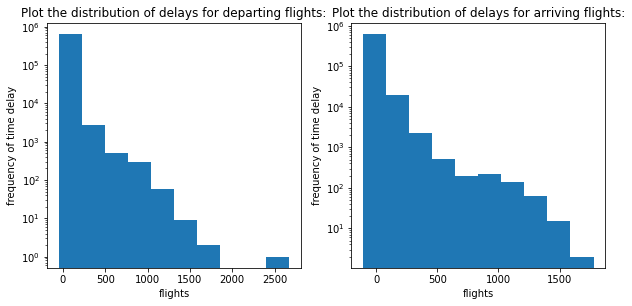

In [32]:
# Histograms for DTW 

plt.figure(figsize=(10,4.5))
plt.subplot(1,2,1)
plt.hist(flights[flights['origin'] == 'DTW']['depDelay']);
plt.yscale('log')
plt.title('Plot the distribution of delays for departing flights:');
plt.xlabel('flights');
plt.ylabel('frequency of time delay');

plt.subplot(1,2,2)
plt.hist(flights[flights['dest'] == 'DTW']['arrDelay']);
plt.yscale('log')
plt.title('Plot the distribution of delays for arriving flights:');
plt.xlabel('flights');
plt.ylabel('frequency of time delay');

In [ ]:
# In te above two histograms we can observe that at zero it has the heighest frequency for the departing delays and arriving delays for prticular flight at DTW. 

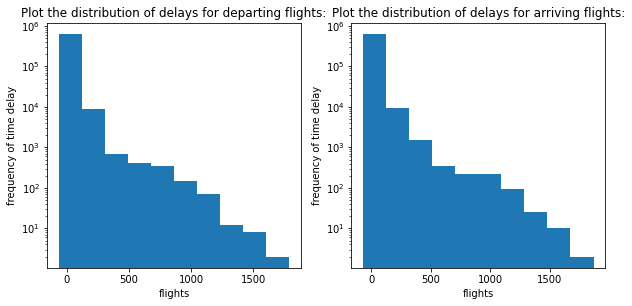

In [33]:
# Histograms for MSP 
plt.figure(figsize=(10,4.5))
plt.subplot(1,2,1)
plt.hist(flights[flights['origin'] == 'MSP']['depDelay']);
plt.yscale('log')
plt.title('Plot the distribution of delays for departing flights:');
plt.xlabel('flights');
plt.ylabel('frequency of time delay');

plt.subplot(1,2,2)
plt.hist(flights[flights['dest'] == 'MSP']['arrDelay']);
plt.yscale('log')
plt.title('Plot the distribution of delays for arriving flights:');
plt.xlabel('flights');
plt.ylabel('frequency of time delay');

In [ ]:
# In te above two histograms we can observe that at zero it has the heighest frequency for the departing delays and arriving delays for prticular flight at MSP.

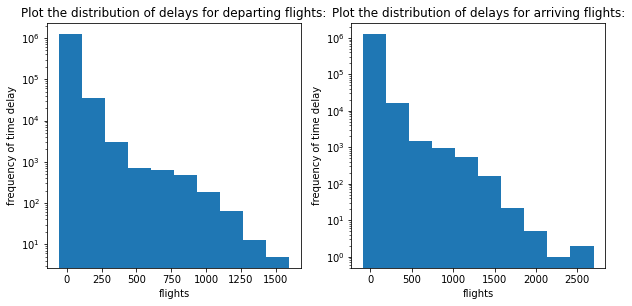

In [34]:
# Histograms for ORD 
plt.figure(figsize=(10,4.5))
plt.subplot(1,2,1)
plt.hist(flights[flights['origin'] == 'ORD']['depDelay']);
plt.yscale('log')
plt.title('Plot the distribution of delays for departing flights:');
plt.xlabel('flights');
plt.ylabel('frequency of time delay');

plt.subplot(1,2,2)
plt.hist(flights[flights['dest'] == 'ORD']['arrDelay']);
plt.yscale('log')
plt.title('Plot the distribution of delays for arriving flights:');
plt.xlabel('flights');
plt.ylabel('frequency of time delay');

In [ ]:
# In te above two histograms we can observe that at zero it has the heighest frequency for the departing delays and arriving delays for prticular flight at ORD.

<!-- END QUESTION -->

## Q10 (3 pts) - Delay Statistics

Present the mean and standard deviation for departure and arrival delays for each airport.

**NOTE: all the autograded tests are hidden for this problem.** If you run the grader_check function it will pass, locally, but will be checked vs. the hidden test cases on Gradescope. 

In [35]:
# Calculate the mean and std. Dev. Depature Delay for flights leaving DTW/MSP/ORD
# Calculate the mean and std. Dev. Arrival Delay for flights arriving at DTW/MSP/ORD

meanArrDTW = flights[(flights['dest'] == 'DTW')]['arrDelay'].mean()
stdArrDTW = flights[(flights['dest'] == 'DTW')]['arrDelay'].std()

meanArrMSP = flights[(flights['dest'] == 'MSP')]['arrDelay'].mean()
stdArrMSP = flights[(flights['dest'] == 'MSP')]['arrDelay'].std()

meanArrORD = flights[(flights['dest'] == 'ORD')]['arrDelay'].mean()
stdArrORD = flights[(flights['dest'] == 'ORD')]['arrDelay'].std()



meanDepDTW = flights[(flights['origin'] == 'DTW')]['depDelay'].mean()
stdDepDTW = flights[(flights['origin'] == 'DTW')]['depDelay'].std()

meanDepMSP = flights[(flights['origin'] == 'MSP')]['depDelay'].mean()
stdDepMSP = flights[(flights['origin'] == 'MSP')]['depDelay'].std()

meanDepORD = flights[(flights['origin'] == 'ORD')]['depDelay'].mean()
stdDepORD = flights[(flights['origin'] == 'ORD')]['depDelay'].std()



print("Depature Delay for flights leaving DTW")
print(" Mean:    ", meanDepDTW)
print(" Std Dev: ", stdDepDTW)

print("Arrival Delay for flights arriving in DTW")
print(" Mean:    ", meanArrDTW)
print(" Std Dev: ", stdArrDTW)

print("\nDepature Delay for flights leaving MSP")
print(" Mean:    ", meanDepMSP)
print(" Std Dev: ", stdDepMSP)

print("Arrival Delay for flights arriving in MSP")
print(" Mean:    ", meanArrMSP)
print(" Std Dev: ", stdArrMSP)

print("\nDepature Delay for flights leaving ORD")
print(" Mean:    ", meanDepORD)
print(" Std Dev: ", stdDepORD)

print("Arrival Delay for flights arriving in ORD")
print(" Mean:    ", meanArrORD)
print(" Std Dev: ", stdArrORD)

Depature Delay for flights leaving DTW
 Mean:     7.5927405833482196
 Std Dev:  43.61499268204409
Arrival Delay for flights arriving in DTW
 Mean:     0.7991628720938059
 Std Dev:  50.98109916207372

Depature Delay for flights leaving MSP
 Mean:     6.530872925944746
 Std Dev:  42.74262685752288
Arrival Delay for flights arriving in MSP
 Mean:     -0.7467615620199904
 Std Dev:  50.62433834186891

Depature Delay for flights leaving ORD
 Mean:     10.842202169241016
 Std Dev:  46.84435393909345
Arrival Delay for flights arriving in ORD
 Mean:     4.996705932310015
 Std Dev:  62.04845806635153


## Patterns of Delays 

Next, you will examine if there are any patterns in the delays.  

For this analysis focus on just the data from ORD, in particular the departure delays. 

<!-- BEGIN QUESTION -->

## Q11 (5 pts) - Departure Delays by Day of Week

Let's examine if the departure delays differ by which day a flight is scheduled to leave.

Create a bar chart showing the mean departure delay for each day of the week.

In order to get the day of the week, I suggest create a new column `dateVal` that is a datetime object.  Then, you can make use of functions to convert datetime to day of the week, day of the year, etc. 


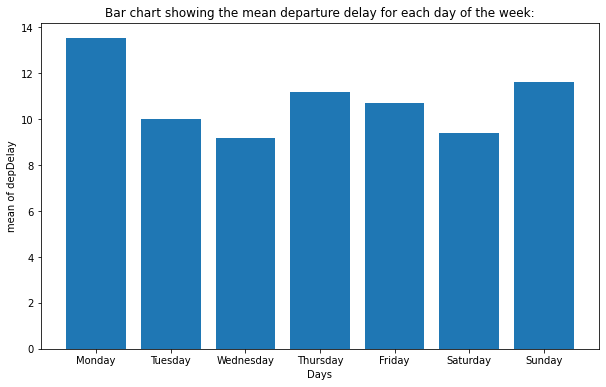

In [42]:
# Look at departure delays for ORD 
# Create a bar chart of the mean `depDelay` by day of the week: Mon., Tues., ...

# Create a new column "dateVal" with a datetime object that may be useful
#  for this and the following questions. 

flights['dateVal'] = flights.month.astype(str) + '-' + flights.day.astype(str) + '-' + flights.year.astype(str)
flights['dateVal'] = pd.to_datetime(flights['dateVal']) #, format = )
flights['dayOfWeek'] = flights['dateVal'].dt.day_name()

plt.figure(figsize=(10,6))
# mean_ORD = flights.groupby('dayOfWeek')['depDelay'].mean().index
x = [ 'Monday','Tuesday','Wednesday', 'Thursday','Friday','Saturday', 'Sunday']
plt.bar( x , flights[flights['origin']=='ORD']['depDelay'].groupby(by = flights['dayOfWeek']).mean().reindex(x));

plt.xlabel('Days');
plt.ylabel('mean of depDelay');
plt.title('Bar chart showing the mean departure delay for each day of the week:');

In [ ]:
#. We can observe that mean of delay flights is highest on Monday.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q12 (5 pts) - Dept. Delays by Month

Next, let's examine if the depature delays differ by month of the year. 

Create a bar chart showing the mean departure delay for each month of the year. 

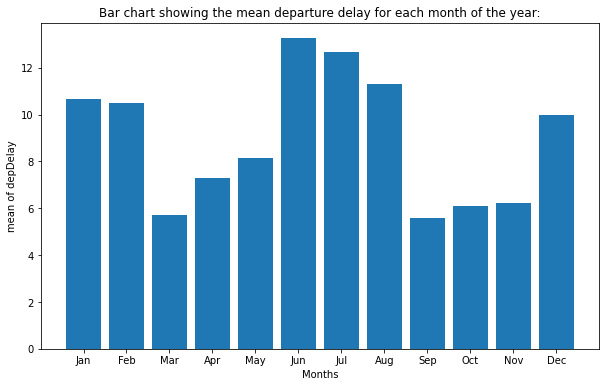

In [40]:
# Create a bar plot with the mean dep. delay for each month. 
plt.figure(figsize=(10,6))
plt.bar(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],flights.groupby('month')['depDelay'].mean().values);
plt.xlabel('Months');
plt.ylabel('mean of depDelay');
plt.title('Bar chart showing the mean departure delay for each month of the year:');

In [ ]:
#. we can observe that mean of delay flights is highest in the month of June.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q13 (6 pts) - Change in Dept. Delays over Time 

Finally, let's examine how the depature delays have changed over time, e.g., has covid impacted depature delays? 

Create a line graph plotting the mean depature delay for data's timespan. 

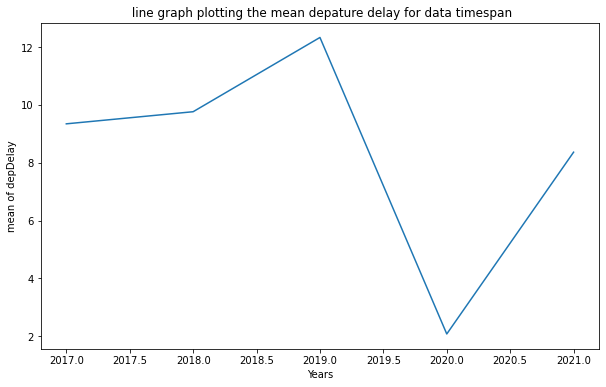

In [41]:
# Create a line chart plotting the mean dep. delay over time
# flights.groupby('year')['depDelay'].mean().values
# flights.groupby('year')['depDelay'].mean().index
plt.figure(figsize=(10,6))
plt.plot(flights.groupby('year')['depDelay'].mean().index , flights.groupby('year')['depDelay'].mean().values);

plt.xlabel('Years');
plt.ylabel('mean of depDelay');
plt.title(' line graph plotting the mean depature delay for data timespan');

In [ ]:
# by observing the bar grap it says that change in depature delay is highest in 2019 and gradually decreased until 2020 due to covid and again increased in 2021.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Bonus (2 pts) - Top Ten Planes 

Find the tail number of the top ten planes, with the worst departure delays (average delays).  You may find `drop_duplicates`, `agg`, and `sort_values` helpful. 
Report out the tail number `tailNum`, number of flights `num`, and the mean delay `mnDelay`. 

In [44]:
# flights['tailNum'].values

array(['N309AS', 'N408AS', 'N520AS', ..., 'N558WN', 'N7711N', 'N268WN'],
      dtype=object)

In [ ]:
# Find the tail numbers of the planes with the worst mean dep. delays. 
# Store the tail number "tailNum", number of flights "num", and
#   mean delay "mnDelay" in a DataFrame


# flights.groupby('year')['depDelay'].avg().values;

# topDelayed = ...
# ...

# topDelayed.head(10)

<!-- END QUESTION -->

